> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This data consists of 14 columns like PatientId, AppointmentID, Gender, etc..


### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import csv

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First, we have to explore the following dataset to observe if it has any duplicates, unique values and messy rows or columns that needs to be fixed.

### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')      
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here we can see that Hipertension and Handcap are misspelled so we need to rename them and also Changing No-Show to No_Show

In [3]:
df.shape

(110527, 14)

This dataset consists of 110527 Rows and 14 columns

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


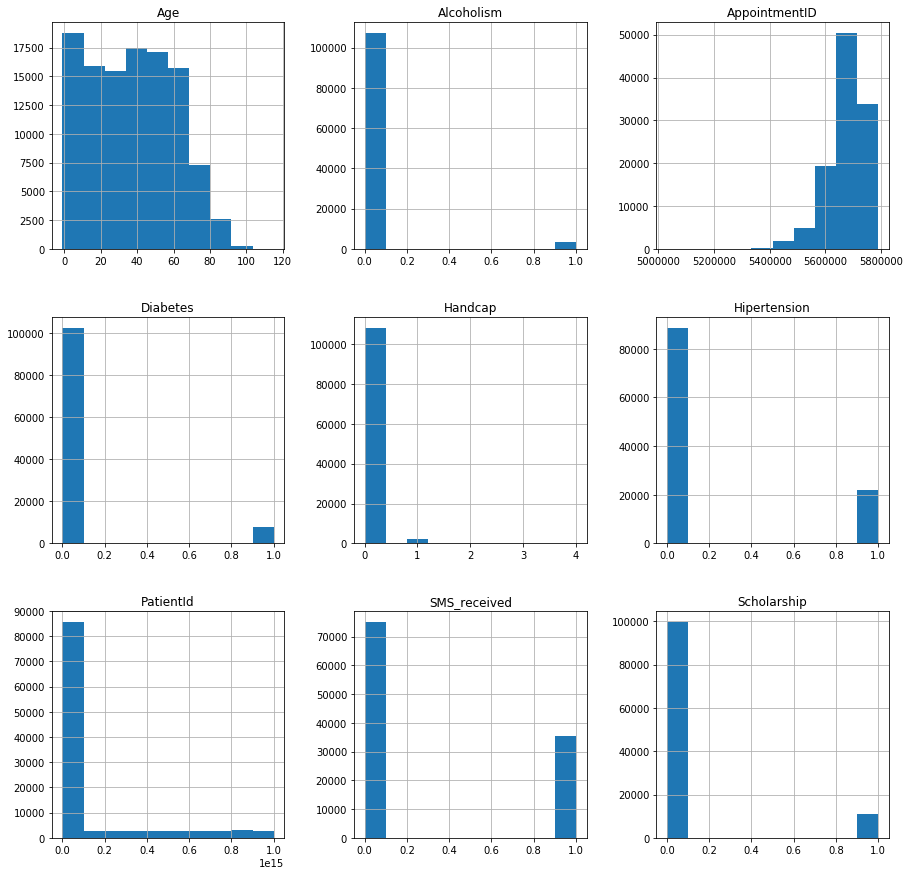

In [5]:
df.hist(figsize=(15,15));

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.duplicated().sum()

0

This dataset has no duplicated rows

In [9]:
df['PatientId'].duplicated().sum()

48228

There are 48228 duplicates rows in PatientId that needs to cleaned 

In [10]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

Here we are checking if there any duplicates between PatientId and No-show

In [11]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Here we can see all the unique values in our dataset

In [12]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

This dataset has no missing values

In [13]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Checking if there any Age number that is smaller than 0, then there is an error that needs to be fixed


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section

In [15]:
#Removing AppointmentID as it is not necessary in our data
df.drop('AppointmentID', axis=1 , inplace=True)

In [16]:
#Checking if AppintmentID has been removed
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# we need to drop Age = -1 Row
df.drop(index=99832, inplace=True)

In [18]:
#Checking if it got deleted or not
df.query('Age < 0')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [19]:
# Renaming columns that are misspelled
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'}, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
#Dropping the Duplicates between patientID and No_Show
df.drop_duplicates(['PatientId', 'No_Show'], inplace=True)

In [21]:
#Checking if they got dropped
df.duplicated(['PatientId', 'No_Show']).sum()

0

### Research Question   (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#### Does age has any effect on to whether the patient will show or not ? 

In [23]:
# First we We'll split our patients into 2 groups first. (show or no show)
show = df.No_Show=='No'
no_show = df.No_Show=='Yes'
df[show].count(),df[no_show].count()

(PatientId         54153
 Gender            54153
 ScheduledDay      54153
 AppointmentDay    54153
 Age               54153
 Neighbourhood     54153
 Scholarship       54153
 Hypertension      54153
 Diabetes          54153
 Alcoholism        54153
 Handicap          54153
 SMS_received      54153
 No_Show           54153
 dtype: int64, PatientId         17663
 Gender            17663
 ScheduledDay      17663
 AppointmentDay    17663
 Age               17663
 Neighbourhood     17663
 Scholarship       17663
 Hypertension      17663
 Diabetes          17663
 Alcoholism        17663
 Handicap          17663
 SMS_received      17663
 No_Show           17663
 dtype: int64)

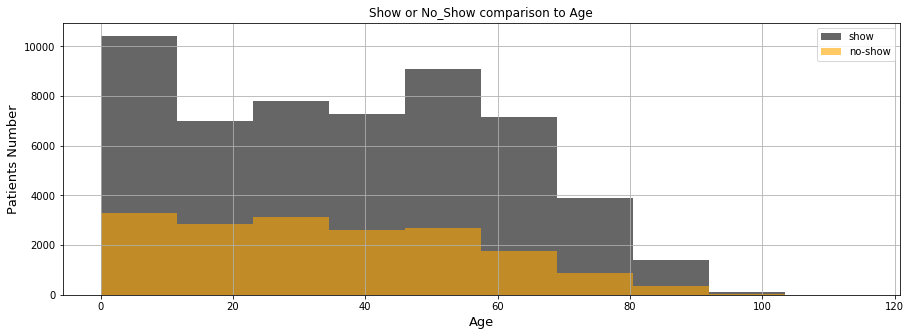

In [24]:
# Then we Want to Check if Age has an effect to whether the patient will show or not
def show_or_not(df,column_name,attended,absent):

    plt.figure(figsize=[15,5])
    df[column_name][show].hist(color="black",label='show',alpha=.6)
    df[column_name][no_show].hist(color="orange",label='no-show',alpha=.6,)
    plt.title('Show or No_Show comparison to Age')
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('Patients Number', fontsize=13)
    plt.legend();
show_or_not(df,'Age',show,no_show)

As seen in the above graph the patients that ages between 0 to 55 were the ones to show more often and the patients that ages between 60 to 100 were the ones that don't show more often

#### Does SMS received has any effect to whether the patient will show or not ?

In [25]:
SMS = df['SMS_received'].value_counts()
SMS

0    47717
1    24099
Name: SMS_received, dtype: int64

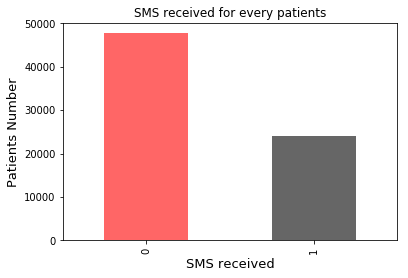

In [26]:
#  Checking if SMS received has any effect to whether the patient will show or not
colors=['red','black']
SMS.plot(kind='bar',title='SMS received for every patients',color=colors,alpha=.6)
plt.xlabel('SMS received', fontsize=13)
plt.ylabel('Patients Number', fontsize=13)
plt.show()

According to the following chart above alot of paitents hadn't received their SMS and only few of them had recevied their SMS this means that there must be some kind of error happened and the SMS messages should be checked again.

#### Does Diseases like Hypertension and Diabetes compaired to age has any effect to whether the patient will show or not ? 

In [27]:
Show_Diseases = df[show].groupby(['Hypertension','Diabetes']).mean()['Age']
Show_Diseases

Hypertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [28]:
Noshow_Diseases = df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age']
Noshow_Diseases

Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

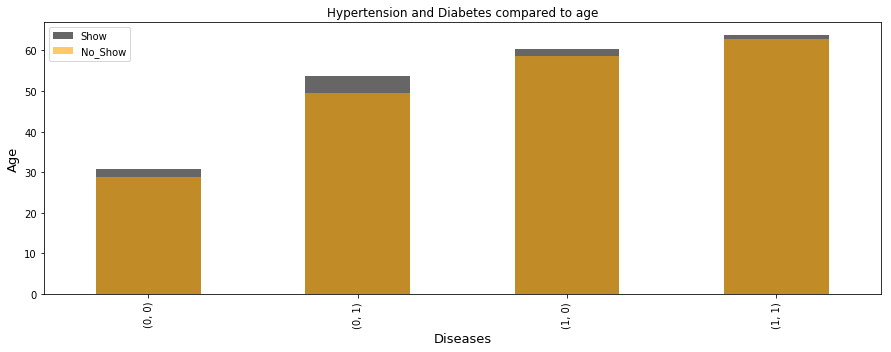

In [29]:
# Checking if Diseases like Hypertension and Diabetes compared to age has any effect to whether the patient will show or not 
plt.figure(figsize=[15,5])
Show_Diseases.plot(kind='bar',title='Hypertension and Diabetes compared to age',color='black',alpha=.6,label='Show')
Noshow_Diseases.plot(kind='bar',title='Hypertension and Diabetes compared to age',color='orange',alpha=.6,label='No_Show')
plt.xlabel('Diseases', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.legend()
plt.show()

According to the above graph there is a Correlation between age and diseases and there is no correlation between diseases and show or not show, because patients with diseases of age 63 and with no diseases of age 30 are showing and patients with diseases of age 62 and with no diseases of age 28 are not showing.

#### Does Gender has any effect to whether the patient will show or not ?

In [30]:
Gender = df[show]['Gender'].value_counts()
Gender

F    34960
M    19193
Name: Gender, dtype: int64

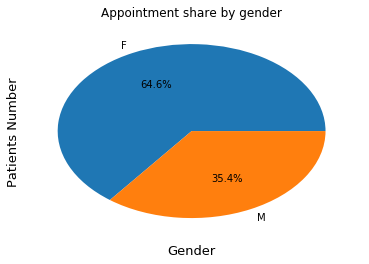

In [31]:
Gender.plot(kind='pie',title='Appointment share by gender',autopct='%1.1f%%')
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Patients Number', fontsize=13)
plt.show()

64.6 % of female patients that shows to their appointment and only 35.4% of male patients that shows to their appointment.
It seems that females need of more medical appointments than males. And according to the information above gender has no effect on attendance

#### Does Neighbourhood has any effect to whether the patient will show or not ?

In [32]:
Neighbourhood = df[show]['Neighbourhood'].value_counts()
Neighbourhood

JARDIM CAMBURI         3666
MARIA ORTIZ            2845
JARDIM DA PENHA        2160
RESISTÊNCIA            2098
ITARARÉ                1745
TABUAZEIRO             1656
CENTRO                 1610
SANTA MARTHA           1577
SANTO ANTÔNIO          1488
BONFIM                 1383
JABOUR                 1247
SANTO ANDRÉ            1246
CARATOÍRA              1224
NOVA PALESTINA         1221
JESUS DE NAZARETH      1219
SÃO PEDRO              1163
DA PENHA               1144
GURIGICA               1012
ANDORINHAS              997
BELA VISTA              975
ILHA DO PRÍNCIPE        968
ROMÃO                   948
SÃO CRISTÓVÃO           943
SÃO JOSÉ                920
MARUÍPE                 880
FORTE SÃO JOÃO          838
ILHA DE SANTA MARIA     826
SÃO BENEDITO            767
JOANA D´ARC             759
CONSOLAÇÃO              754
                       ... 
DO CABRAL               286
ESTRELINHA              254
SOLON BORGES            242
SANTOS REIS             241
PIEDADE             

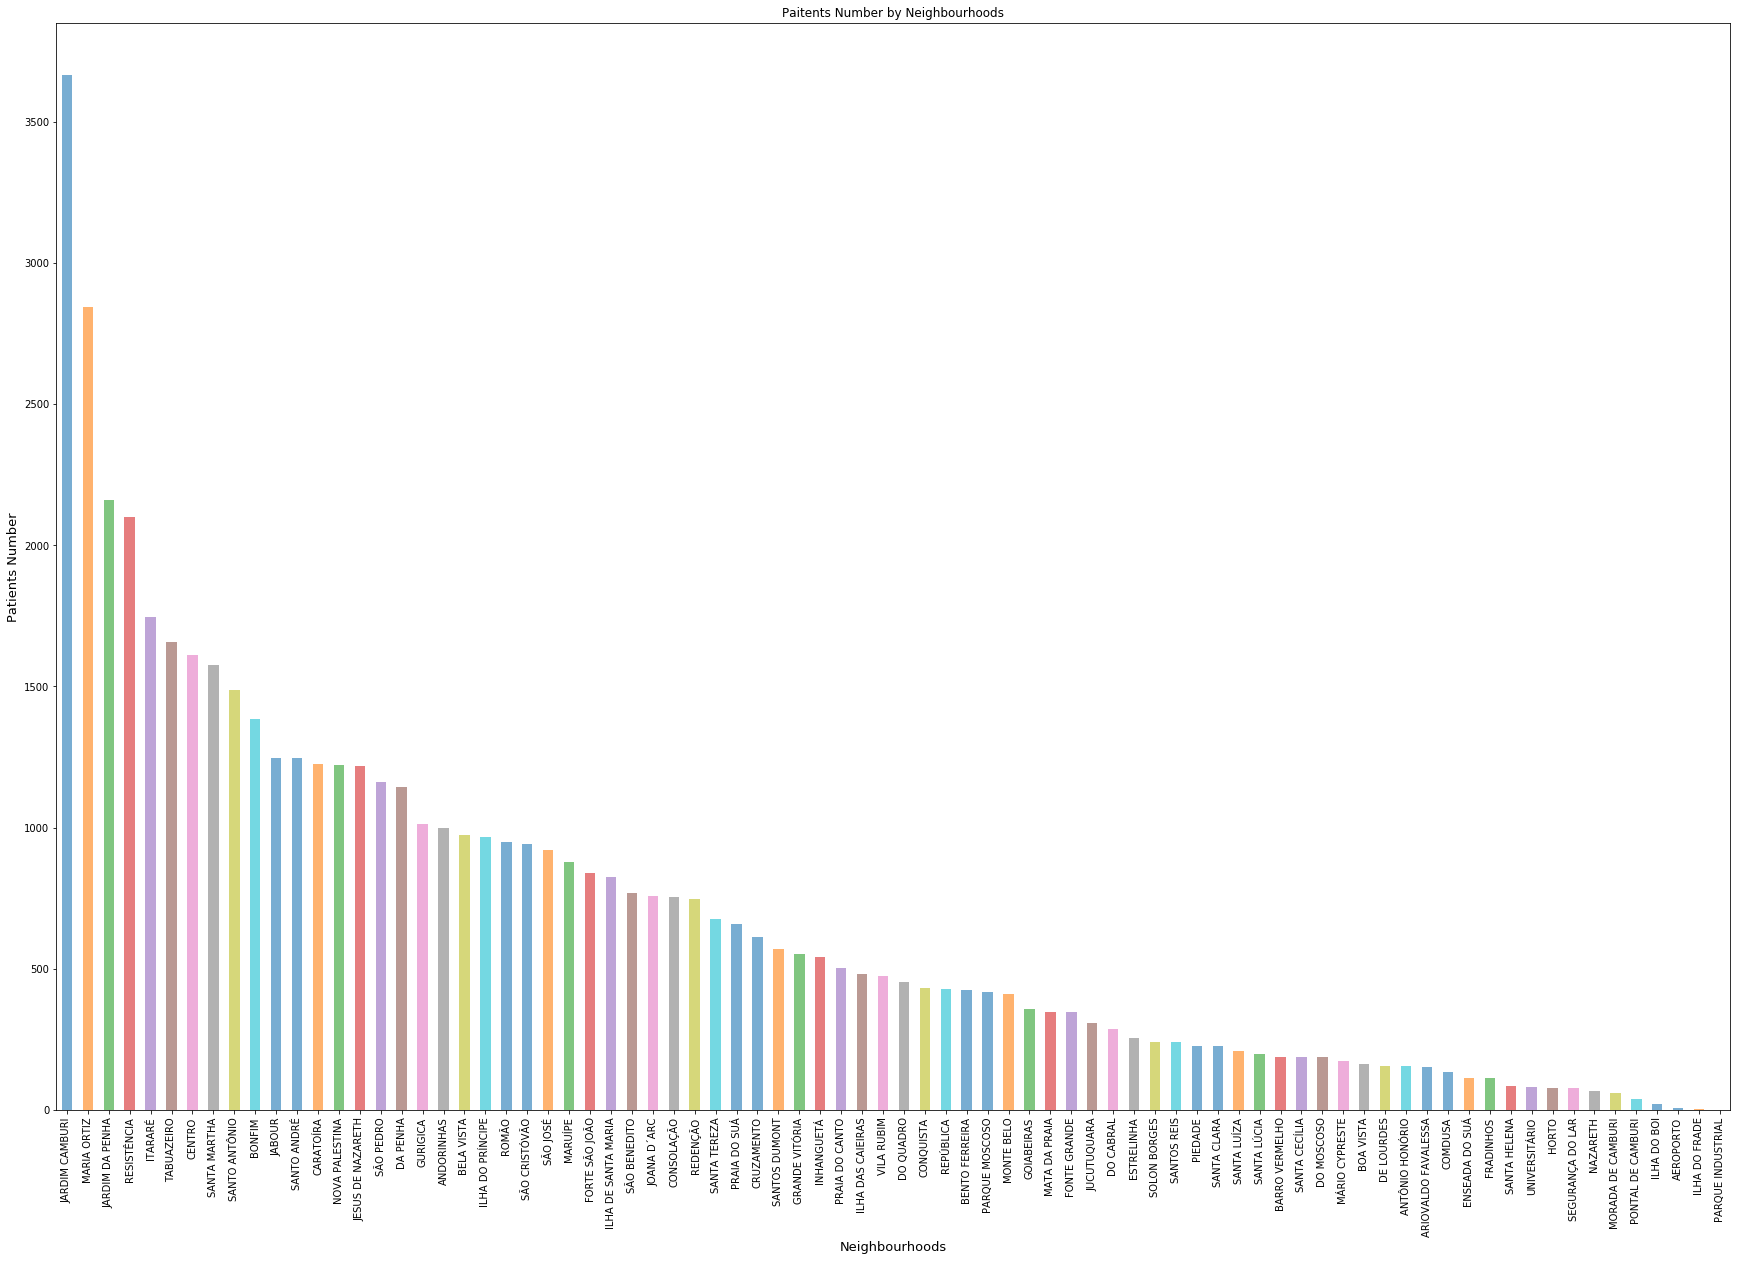

In [33]:
plt.figure(figsize=[30,20])
Neighbourhood.plot(kind='bar',title='Paitents Number by Neighbourhoods',alpha=.6)
plt.xlabel('Neighbourhoods', fontsize=13)
plt.ylabel('Patients Number', fontsize=13)
plt.show()

According to the above graph JARDIM CAMBURI has the highest number of patients and the highest number of paitents that are showing up compaired to the other Neighbourhoods which seems that this Neighbourhood is of utmost need of medical care

#### Does Alcoholism has any effect to whether the patient will show or not ?

In [34]:
Show_Alcoholism = df[show]['Alcoholism'].value_counts()
Show_Alcoholism

0    52875
1     1278
Name: Alcoholism, dtype: int64

In [35]:
Noshow_Alcoholism = df[no_show]['Alcoholism'].value_counts()
Noshow_Alcoholism

0    17143
1      520
Name: Alcoholism, dtype: int64

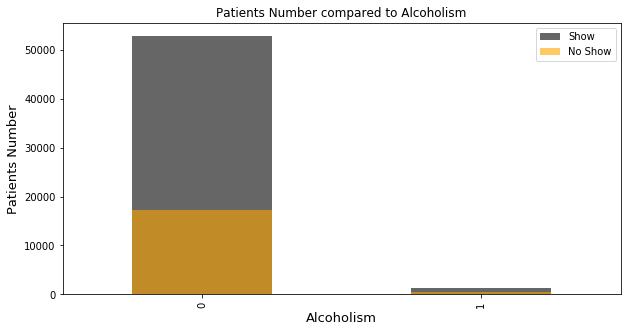

In [36]:
plt.figure(figsize=[10,5])
Show_Alcoholism.plot(kind='bar',title='Patients Number compared to Alcoholism',color='black',alpha=.6,label='Show')
Noshow_Alcoholism.plot(kind='bar',title='Patients Number compared to Alcoholism',color='orange',alpha=.6,label='No Show')
plt.xlabel('Alcoholism', fontsize=13)
plt.ylabel('Patients Number', fontsize=13)
plt.legend()
plt.show()

According to the above graph Alcoholism has a very minor impact on attendace

#### Does Handicap has any effect to whether the patient will show or not ?

In [37]:
Show_Handicap = df[show]['Handicap'].value_counts()
Show_Handicap

0    53126
1      931
2       89
3        5
4        2
Name: Handicap, dtype: int64

In [38]:
Noshow_Handicap = df[no_show]['Handicap'].value_counts()
Noshow_Handicap

0    17385
1      247
2       27
3        3
4        1
Name: Handicap, dtype: int64

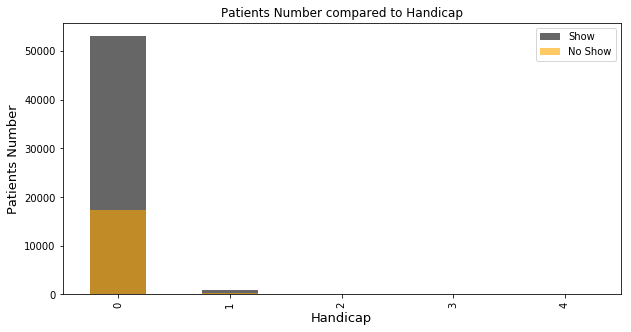

In [39]:
plt.figure(figsize=[10,5])
Show_Handicap.plot(kind='bar',title='Patients Number compared to Handicap',color='black',alpha=.6,label='Show')
Noshow_Handicap.plot(kind='bar',title='Patients Number compared to Handicap',color='orange',alpha=.6,label='No Show')
plt.xlabel('Handicap', fontsize=13)
plt.ylabel('Patients Number', fontsize=13)
plt.legend()
plt.show()

According to the above graph Handicap has a very minor impact on attendace

# <a id='conclusions'></a>
## Conclusions


### Research Question   (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

According to Age, patients that ages between 0 to 55 were the ones to show more often and the patients that ages between 60 to 100 were the ones that don't show more often.

According to SMS, alot of paitents hadn't received their SMS and only few of them had recevied their SMS this means that there must be some kind of error happened and the SMS messages should be checked again.

According to Diseases like Hypertension and Diabetes compaired to age, there is a Correlation between age and diseases and there is no correlation between diseases and show or not show,

According to Gender, It has no effect on attendance.

According to Neighbourhoods, JARDIM CAMBURI has the highest number of patients and the highest number of paitents that are showing up compaired to the other Neighbourhoods which seems that this Neighbourhood is of utmost need of medical care.

According to Alcoholism, It has a very minor impact on attendace.

According to Handicap, It has a very minor impact on attendace.

### Limitation 

There was not enough information regarding appointments or medical history, and no statistical analysis was performed due to the lack of data.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0